# Medium Reinforcement Learning

In [1]:
import gym
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import time
from celluloid import Camera

In [2]:
env_name = "MountainCar-v0"
# env_name = "MountainCarContinuous-v0"
env = gym.make(env_name).env

obs = env.reset()
# env.render()

In [3]:
env.action_space.n

3

In [4]:
# env.action_space.low, env.action_space.high

In [5]:
nv = env.unwrapped
env.seed()
np.random.seed(1)

In [6]:
n_states = 200
J = 100

## Functions

In [7]:
def discretization(env, obs):
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low) / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled = int((obs[0] - pos_low) / pos_den)
    vel_scaled = int((obs[1] - vel_low) / vel_den)
    return pos_scaled, vel_scaled


In [8]:
def visualise_actions(mat, ax =None):
    if ax == None:
        fig = plt.figure(figsize = (5,5))
        ax = fig.add_subplot()
    labels = ["Move Left", "Don't Accelerate", "Move Right"]
    cmap = plt.cm.get_cmap('Blues', 8) 
    ax.pcolor(range(-int(n_states/2),int(n_states/2)), range(-int(n_states/2), int(n_states/2)), mat[::-1, ::1], cmap = cmap)
    ax.set_xlabel("Position", fontsize = 15)
    ax.set_ylabel("Velocity", fontsize = 15)
    ax.set_title("Approximate Value Function", fontsize = 15)


    bound = np.linspace(0, 2, 4)
    # Preparing borders for the legend
    bound_prep = np.round(bound * 7, 2)
    ax.legend([mpatches.Patch(color=cmap(b)) for b in bound[:-1]],
               [labels[i] for i in range(3)])

In [9]:
def visualise_conf(mat):
    plt.figure(figsize = (5,5))
    labels = ["Move Left", "Don't Accelerate", "Move Right"]
    cmap = plt.cm.get_cmap('Blues', 8) 
    plt.pcolor(range(-int(n_states/2),int(n_states/2)), range(-int(n_states/2), int(n_states/2)), mat[::-1, ::-1], cmap = cmap)
    plt.xlabel("Position", fontsize = 15)
    plt.ylabel("Velocity", fontsize = 15)
    plt.title("Confidence Plot?", fontsize = 15)


    bound = np.linspace(0, 2, 4)
    # Preparing borders for the legend
    bound_prep = np.round(bound * 7, 2)
#     plt.legend([mpatches.Patch(color=cmap(b)) for b in bound[:-1]],
#                [labels[i] for i in range(3)])

## TABULAR METHOD

In [10]:
def tabular_method(
    n_states = 40,
    episodes = 1000,
    initial_lr = 1.0,
    min_lr = 0.005,
    gamma = 0.95,
    max_stps = 100000,
    epsilon = 0.05):
    
    q_table = np.zeros((n_states, n_states, env.action_space.n))
#     q_table = np.zeros((n_states, n_states,1))# env.action_space.n))
    
    tabular_steps = []
    

    q_table_l = []
    q_table_l.append(q_table)
    
    for episode in range(episodes):

        obs = env.reset()
        total_reward = 0
        alpha = max(min_lr, initial_lr*(gamma**(episode//100)))

        steps = 0
        while True:
    #         env.render()
            pos, vel = discretization(env, obs)
            pos, vel = int(pos), int(vel) # tabular method need ints
            if np.random.uniform(low=0, high=1) < epsilon:
#                 a = np.random.uniform(low = env.action_space.low, high = env.action_space.high)
                a = np.random.choice(env.action_space.n) #for discrete action space
            else:
#                 a = q_table[pos][vel]
                a = np.argmax(q_table[pos][vel])
            try:
                obs, reward, terminate,_ = env.step(a)
            except Exception as e:
                print("ACTION", a)
                
                print(e)
                return()
            total_reward += abs(obs[0]+0.5)
            pos_, vel_ = discretization(env, obs)
            pos_, vel_ = int(pos_), int(vel_)


            # Q function update
            q_table[pos][vel][a] = (1-alpha)*q_table[pos][vel][a] + alpha*(reward+gamma*np.max(q_table[pos_][vel_]))

#             update = (1-alpha)*q_table[pos][vel] + alpha*(reward+gamma*q_table[pos_][vel_])
#             if update > 1:
#                 update = 1
#             elif update < -1:
#                 update = -1

#             q_table[pos][vel] = update
            
            # value : the optimum action i can take is the reward that i get from taking that action + 
            # gamma x the optimum I can gather as value from where I go
            
            
            # if steps%200 == 0:
            #     q_table_l.append(np.copy(q_table))
            steps += 1
            if steps%max_stps == 0:
                print("FAILED")
                break
            if terminate:
                tabular_steps.append(steps)
                if episode % 100 == 0:
                    print("Episode:", episode, "Alpha: ", alpha, "Steps: ", steps)
                break
        q_table_l.append(np.copy(q_table))
    env.close()
    return(q_table_l)

In [11]:
q_table_l = tabular_method(n_states)

FAILED
FAILED
FAILED
Episode: 100 Alpha:  0.95 Steps:  562
Episode: 200 Alpha:  0.9025 Steps:  665
Episode: 300 Alpha:  0.8573749999999999 Steps:  452
Episode: 400 Alpha:  0.8145062499999999 Steps:  377
Episode: 500 Alpha:  0.7737809374999998 Steps:  471
Episode: 600 Alpha:  0.7350918906249998 Steps:  419
Episode: 700 Alpha:  0.6983372960937497 Steps:  406
Episode: 800 Alpha:  0.6634204312890623 Steps:  495
Episode: 900 Alpha:  0.6302494097246091 Steps:  375


In [ ]:
env_name = "MountainCar-v0"
# env_name = "MountainCarContinuous-v0"
env = gym.make(env_name).env

obs = env.reset()

In [ ]:
import gym
from gym.wrappers import Monitor
env = Monitor(gym.make(env_name), './video', force=True)
state = env.reset()
done = False
while not done:
    action = env.action_space.sample()
    state_next, reward, done, info = env.step(action)
env.close()

In [13]:
for e in range(5):
    obs = env.reset()
    steps = 0
    while True:
        env.render()
        pos, vel = discretization(env, obs)
        pos, vel = int(pos), int(vel)
#         a = q_table[pos][vel]
        a = np.argmax(q_table[pos][vel])
#         a = int(m[pos][vel])
        obs, reward, terminate, _ = env.step(a)
        steps += 1

        if steps >= 1000:
            print("FAILED")
            break
        if terminate:
            time.sleep(1)
            print(steps)
            break

NoSuchDisplayException: Cannot connect to "None"

In [13]:
len(q_table_l)

1001

In [14]:
len(q_table_l[::3])

334

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


<Figure size 432x288 with 0 Axes>

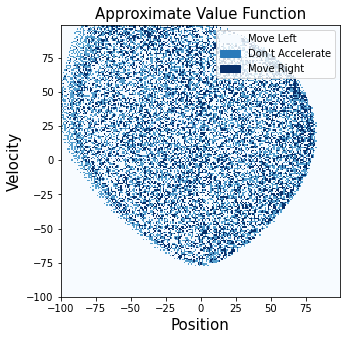

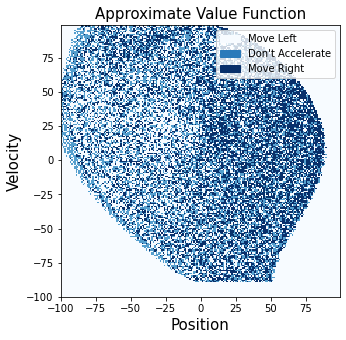

In [15]:
fig = plt.figure()

for i in [q_table_l[3], q_table_l[-1]]:
    mat_actions = np.argmax(i, axis =2)
    
    visualise_actions(mat_actions) #make gif of this
    plt.show

0 / 1001


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


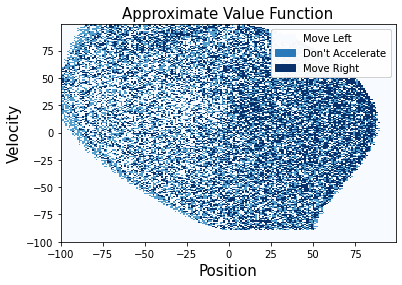

100 / 1001
200 / 1001
300 / 1001


In [16]:
fig = plt.figure()
camera = Camera(fig)
ax = fig.add_subplot()

for index, i in enumerate(q_table_l[::3]):
    if index%100 == 0:
        print(index, "/", len(q_table_l))
    
    mat_actions = np.argmax(i, axis =2)
    
    visualise_actions(mat_actions, ax) #make gif of this
    
    plt.clf
    camera.snap()
    plt.show()

In [17]:
animation = camera.animate(interval = 20, repeat = True, repeat_delay = 5000)

In [18]:
animation.save('anim_ value_func_full.gif', writer='PillowWriter', fps=30)

MovieWriter PillowWriter unavailable; using Pillow instead.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


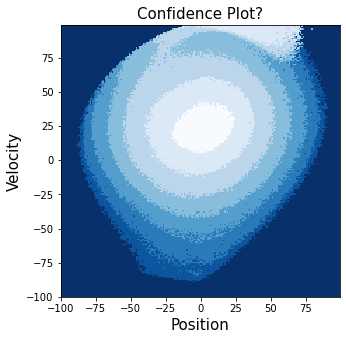

In [20]:
visualise_conf(mat)

# Gradient Descent

In [21]:
q_table.shape

(200, 200, 3)

In [22]:
def construct_states(n = n_states):
    states = []
    for i in range(n):
        for j in range(n):
            for k in range(3):
#                 print(i, j, k)
                states.append(np.array([i, j,k]))
    states = np.asarray(states)
    return(states)

In [23]:
# n_states = 100

In [24]:
states = construct_states(n_states)

In [25]:
states

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,   2],
       ...,
       [199, 199,   0],
       [199, 199,   1],
       [199, 199,   2]])

In [26]:
def get_means(J):
    """
    Getting J cluster centers for the radial basis model
    """
#     print(df_values.shape)
    X = states #state space is the position, velocity and action
    means = []

    N = len(states)
    sig = np.std(X)
    
    for i in range(3):
        means.append(np.linspace(X[:, i].min(), X[:, i].max(), J))
    means  = np.array(means).T
    
    U = np.zeros((N,J))

    for i in range(N):
        for j in range(J):
            U[i][j] = np.exp(-0.5 *np.linalg.norm(X[i] - means[j])/(sig))
    
    return(U, means)

In [27]:
U, kmeans = get_means(J)

In [28]:
U.shape

(120000, 100)

In [29]:
def evaluate_a(pos, vel, a, w):
    """
    Getting the value from a state
    
    input: state, action, weights vector
    
    Output: value of action in that state
    
    Method: convert the state and action into the design matrix, then dot product the weights 
    
    """
    states = np.array([pos, vel, a])
    U = []
    for j in range(J):
        U.append(np.exp(-0.5 *np.linalg.norm(states - kmeans[j])/sig))
    return(U @ w, U)

In [30]:
def RBF(pos, vel, w):
    """
    RBF for the values of all possible actions from that state
    
    """
    vals = []
    for act in range(3):
        U = []
        states = np.array([pos, vel, act])
        for j in range(J):
            U.append(np.exp(-0.5 *np.linalg.norm(states - kmeans[j])/sig))
        vals.append(U @ w)
    return(vals)

## Q-learning

In [31]:
# try neural network? train on gpu

In [32]:
def discretization(env, obs): #NO INT
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_den = (env_high - env_low)# / n_states
    pos_den = env_den[0]
    vel_den = env_den[1]
    pos_high = env_high[0]
    pos_low = env_low[0]
    vel_high = env_high[1]
    vel_low = env_low[1]
    pos_scaled =(obs[0] - pos_low) / pos_den   #int((obs[0] - pos_low) / pos_den)
    vel_scaled = (obs[1] - vel_low) / vel_den#int((obs[1] - vel_low) / vel_den)
    return(pos_scaled, vel_scaled)

In [33]:
X = states #state space is the position, velocity and action
sig = np.std(X)

In [34]:
def q_learning(
    n_states = n_states,
    episodes = 50,
    initial_lr = 1.0,
    min_lr = 0.005,
    gamma = 0.99,
    max_stps = 30000,
    epsilon = 0.05):



    q_table = np.zeros((n_states, n_states, env.action_space.n))
    total_steps = []


    w = np.random.rand(J, 1)
    for episode in range(episodes):


        obs = env.reset()
        total_reward = 0
        alpha = max(min_lr, initial_lr*(gamma**(episode/0.1)))# max(min_lr, initial_lr*(gamma**(episode//100)))

        steps = 0
        while True:

            pos, vel = discretization(env, obs)

            if np.random.uniform(low=0, high=1) < epsilon:
                a = np.random.choice(env.action_space.n)
                a_value, U = evaluate_a(pos, vel, a, w)
            else:
                a = np.argmax(RBF(pos, vel, w))
                a_value, U = evaluate_a(pos, vel, a, w)

            obs, reward, terminate,_ = env.step(a)
            total_reward += abs(obs[0]+0.5)
            pos_, vel_ = discretization(env, obs)

            states = np.array([pos, vel, a])

            max_val = np.max(RBF(pos_,vel_, w)) #random thing for sarsa

            # Q function update
            w += (alpha * (reward + gamma*max_val - a_value) * U).reshape(J,1)
            

            steps += 1
            if terminate:
                total_steps.append(steps)
                print("Episode:", episode, steps)
                break
    return(w)

In [35]:
w_q_learning = q_learning()

Episode: 0 9420
Episode: 1 54656
Episode: 2 7168
Episode: 3 8198
Episode: 4 40212
Episode: 5 20075
Episode: 6 8974
Episode: 7 13552
Episode: 8 14970
Episode: 9 26066
Episode: 10 21849
Episode: 11 11086
Episode: 12 14210
Episode: 13 8206
Episode: 14 31723
Episode: 15 10361
Episode: 16 29181
Episode: 17 7002
Episode: 18 21016
Episode: 19 10413
Episode: 20 30998
Episode: 21 40016
Episode: 22 17910
Episode: 23 14880
Episode: 24 8454
Episode: 25 10984
Episode: 26 15939
Episode: 27 38935
Episode: 28 33685
Episode: 29 22414
Episode: 30 7671
Episode: 31 11098
Episode: 32 46004
Episode: 33 5181
Episode: 34 15289
Episode: 35 36465
Episode: 36 9459
Episode: 37 18044
Episode: 38 8496
Episode: 39 18957
Episode: 40 12909
Episode: 41 46289
Episode: 42 8446
Episode: 43 20111
Episode: 44 31773
Episode: 45 11207
Episode: 46 18083
Episode: 47 24753
Episode: 48 9297
Episode: 49 20069


In [36]:
U.shape, w_q_learning.shape

((120000, 100), (100, 1))

In [37]:
q_learning_table = np.zeros([n_states,n_states])
step = 0
for i in range(n_states):
    for j in range(n_states):
        q_learning_table[i][j] = np.argmax(U[step*3: step*3+3] @ w_q_learning)
        step += 1

In [38]:
q_learning_table.shape

(200, 200)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


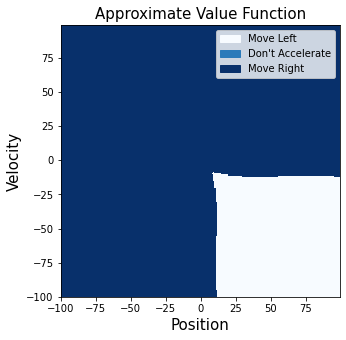

In [39]:
visualise_actions(q_learning_table)

In [40]:
# for e in range(100):
#     obs = env.reset()
#     steps = 0
#     while True:
# #         env.render()
#         pos, vel = discretization(env, obs)
#         pos, vel = int(pos), int(vel)
# #         a = q_table[pos][vel]
#         a = np.argmax(q_learning_table[pos][vel])
# #         a = int(m[pos][vel])
#         obs, reward, terminate, _ = env.step(a)
#         steps += 1

#         if steps >= 1000:
#             print("FAILED")
#             break
#         if terminate:
#             time.sleep(1)
#             print(steps)
#             break

In [ ]:
# for e in range(100):
#     obs = env.reset()
#     steps = 0
#     while True:
# #         env.render()
#         pos, vel = discretization(env, obs)
#         a = np.argmax(RBF(pos, vel, w_q_learning))

#         obs, reward, terminate, _ = env.step(a)
#         steps += 1

#         if steps >= 1000:
#             print("FAILED")
#             break
#         if terminate:
#             time.sleep(1)
#             print(steps)
#             break